In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data_dir = "/Users/ggraham/repos/soilqc_anomaly_detection/data/"
save_dir = "../data/sensors/"

%matplotlib inline

# Save all of XLSX file's sheets

In [21]:
excel_file = "/Users/ggraham/Desktop/TX_Port_Aransas_32_NNE.XLSX"
sheet_names = ["2019-"+str(i).zfill(2) for i in range(3, 12)]

In [23]:
df_dict = {
    idx : None
    for idx in range(len(sheet_names))
}
for idx, sheet_name in enumerate(sheet_names):
    df = pd.read_excel(
        excel_file, 
        sheet_name=sheet_name,
        header=185,
    )
    df_dict[idx] = df
#     df.to_csv(data_dir+f"tx_port_aransas_data/{sheet_name}.csv")

# Concat all months together and check for missing sensors

In [24]:
df_all = pd.concat(
    [
        df_dict[idx] for idx in df_dict.keys()
    ],
    axis=0
)

In [25]:
df_all = df_all.drop(
    columns=[
        c for c in df_all.columns 
        if "MEAN" in c
    ] + ["DAY_HOUR"]
)

In [26]:
df_all =\
    df_all.dropna(axis=1, how="all")

# Drop sensor H_M3005 b/c it is half NaN's.
df_all = df_all.drop(columns=["H_M3005"])

In [27]:
df_all =\
    df_all.fillna(method="ffill")

df_all.head()

,A_M2005,A_M2010,H_M3010,A_M1020,H_M2020,A_M3020,A_M1050,A_M1100,P_OFFICIAL
0,NaN,NaN,0.369,NaN,0.332,NaN,NaN,NaN,0.3
1,NaN,NaN,0.369,NaN,0.332,NaN,NaN,NaN,0.0
2,NaN,NaN,0.369,NaN,0.333,NaN,NaN,NaN,0.0
3,NaN,NaN,0.369,NaN,0.333,NaN,NaN,NaN,0.0
4,NaN,NaN,0.371,NaN,0.333,NaN,NaN,NaN,0.0


In [29]:
# Create first finite difference feature
df_diff = df_all.diff()
df_diff.iloc[0] = np.zeros(len(df_diff.columns))

# Test an automatic labeling system
labels = df_diff.drop(columns=["P_OFFICIAL"])
labels = labels > 0.5
labels = labels.astype(int)
labels.sum()

A_M2005    134
A_M2010    145
H_M3010      0
A_M1020    289
H_M2020      0
A_M3020    141
A_M1050    295
A_M1100    260
dtype: int64

In [31]:
df_all =\
    df_all.fillna(method="bfill")

df_all.head()

,A_M2005,A_M2010,H_M3010,A_M1020,H_M2020,A_M3020,A_M1050,A_M1100,P_OFFICIAL
0,0.336,0.411,0.369,0.391,0.332,0.421,0.399,0.386,0.3
1,0.336,0.411,0.369,0.391,0.332,0.421,0.399,0.386,0.0
2,0.336,0.411,0.369,0.391,0.333,0.421,0.399,0.386,0.0
3,0.336,0.411,0.369,0.391,0.333,0.421,0.399,0.386,0.0
4,0.336,0.411,0.371,0.391,0.333,0.421,0.399,0.386,0.0


In [32]:
# Create first finite difference feature
df_diff = df_all.diff()
df_diff.iloc[0] = np.zeros(len(df_diff.columns))

In [33]:
df_diff

,A_M2005,A_M2010,H_M3010,A_M1020,H_M2020,A_M3020,A_M1050,A_M1100,P_OFFICIAL
0,0.0,0.000,0.000,0.0,0.000,0.0,0.0,0.0,0.0
1,0.0,0.000,0.000,0.0,0.000,0.0,0.0,0.0,-0.3
2,0.0,0.000,0.000,0.0,0.001,0.0,0.0,0.0,0.0
3,0.0,0.000,0.000,0.0,0.000,0.0,0.0,0.0,0.0
4,0.0,0.000,0.002,0.0,0.000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
610,0.0,0.000,0.000,0.0,0.001,0.0,0.0,0.0,0.0
611,0.0,0.000,0.000,0.0,0.000,0.0,0.0,0.0,0.0
612,0.0,0.000,0.000,0.0,-0.001,0.0,0.0,0.0,0.0
613,0.0,-0.001,0.000,0.0,0.001,0.0,0.0,0.0,0.0


In [36]:
df_all["H_M2020"]

0      0.332
1      0.332
2      0.333
3      0.333
4      0.333
       ...  
610    0.071
611    0.071
612    0.070
613    0.071
614    0.071
Name: H_M2020, Length: 6373, dtype: float64

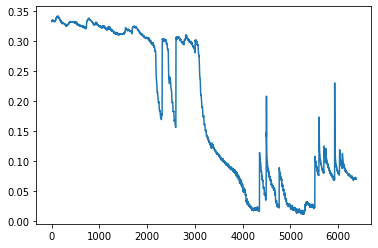

In [38]:
plt.plot(df_all["H_M2020"].values)

In [32]:
# Test an automatic labeling system
labels = df_diff.drop(columns=["P_OFFICIAL"])
labels = labels > 0.5
labels = labels.astype(int)
labels.sum()

A_M2005    134
A_M2010    145
H_M3010      0
A_M1020    289
H_M2020      0
A_M3020    141
A_M1050    295
A_M1100    260
dtype: int64

In [6]:
# Create first finite difference feature
df_diff = df_all.diff()
df_diff.iloc[0] = np.zeros(len(df_diff.columns))

# Test an automatic labeling system
labels = df_diff.drop(columns=["P_OFFICIAL"])
labels = labels > 0.1
labels = labels.astype(int)
labels.sum()

In [ ]:
# Export labeled sensor data to CSV for manual inspection/curation
for idx in range(8):
    sensor = pd.concat(
        [df.iloc[:, idx], df_diff.iloc[:, idx], df["P_OFFICIAL"], labels.iloc[:, idx]], 
        axis=1
    )
    sensor.columns = ["raw", "diff", "precip", "label"]
    sensor.to_csv(save_dir + f"{df.columns[idx]}.csv")

# Perform for all months, all sensors

In [124]:
months = ["09", "10", "11"]

df = pd.concat(
    [
        pd.read_csv(data_dir+f"2019_{month}.csv")
        for month in months
    ],
    axis=0
)

In [126]:
# Clean up df.
df = df.drop(
    columns=[
        c for c in df.columns 
        if "MEAN" in c
    ] + ["DAY_HOUR"]
)
df = df.dropna(axis=1, how="all")
df = df.fillna(method="ffill", axis=1)

df.head(10)

,A_M2005,A_M2010,H_M3010,A_M1020,H_M2020,A_M3020,A_M1050,A_M1100,P_OFFICIAL
0,0.044,0.017,0.015,0.060,0.086,0.016,0.066,0.199,0.0
1,0.044,0.017,0.015,0.060,0.086,0.016,0.066,0.200,0.0
2,0.044,0.017,0.015,0.059,0.084,0.016,0.066,0.199,0.0
3,0.044,0.017,0.015,0.059,0.083,0.016,0.066,0.199,0.0
4,0.044,0.017,0.014,0.059,0.083,0.016,0.066,0.199,0.0
5,0.044,0.017,0.015,0.059,0.084,0.016,0.066,0.199,0.0
6,0.044,0.017,0.014,0.059,0.082,0.016,0.066,0.199,0.0
7,0.044,0.017,0.011,0.060,0.083,0.016,0.066,0.199,0.0
8,0.044,0.017,0.010,0.059,0.081,0.016,0.066,0.199,0.0
9,0.044,0.017,0.017,0.060,0.081,0.016,0.066,0.199,0.0
